# Recurrent Neural Networks

calcular o preço das ações do google

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [5]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout
# Import tensorflow
import tensorflow as tf

In [6]:
# Antes de tudo, definimos a parte do dataset que vamos testar (para que não varie entre os testes com mesmos hiperparâmetros, etc);

tf.random.set_seed(32) 

In [7]:
# Part 2 - Building the RNN

# Initialising the RNN
regressor = Sequential()

# Utilizando o GRU na primeira camada
regressor.add(GRU(units = 100, activation='elu', dropout=0.2, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Utilizando o GRU na segunda camada
regressor.add(GRU(units = 100, activation='elu', dropout=0.2, return_sequences = True))

# Utilizando o GRU na terceira camada
regressor.add(GRU(units = 100, activation='tanh', dropout=0.1, return_sequences = True))

# Utilizando o GRU na quarta camada
regressor.add(GRU(units = 50, dropout=0.2))

# Utilizando o GRU na camada de saída
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_absolute_error')

In [8]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
38/38 [==============================] - 13s 179ms/step - loss: 0.1346
Epoch 2/25
38/38 [==============================] - 7s 175ms/step - loss: 0.0874
Epoch 3/25
38/38 [==============================] - 7s 177ms/step - loss: 0.0771
Epoch 4/25
38/38 [==============================] - 7s 178ms/step - loss: 0.0741
Epoch 5/25
38/38 [==============================] - 7s 178ms/step - loss: 0.0716
Epoch 6/25
38/38 [==============================] - 7s 178ms/step - loss: 0.0664
Epoch 7/25
38/38 [==============================] - 7s 178ms/step - loss: 0.0618
Epoch 8/25
38/38 [==============================] - 7s 178ms/step - loss: 0.0605
Epoch 9/25
38/38 [==============================] - 7s 178ms/step - loss: 0.0594
Epoch 10/25
38/38 [==============================] - 7s 180ms/step - loss: 0.0547
Epoch 11/25
38/38 [==============================] - 7s 176ms/step - loss: 0.0546
Epoch 12/25
38/38 [==============================] - 7s 178ms/step - loss: 0.0507
Epoch 13/25
38/38 [=====

In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

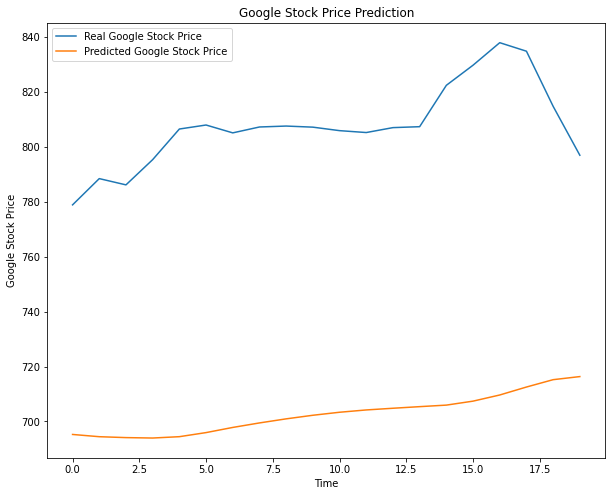

In [10]:
# Visualising the results
plt.figure(figsize = (10,8))
plt.plot(real_stock_price, label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print(mae)

104.84292504882812


## FIM